SETUP LIBRARY

In [31]:
!pip install spotipy

In [32]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd

CONNECT TO SPOTIFY API

In [33]:
client_id = "6c872d34320c4dee9f8005c6d2669cda"
client_secret = "a1b708037c17403199044ae8042d9f36"

In [34]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

INITIATE ARTIST NAME

In [35]:
artist_name = ['Drake', 'Taylor Swift', 'Sam Smith', 'd4vd', 'Lil Uzi Vert', 'Steve Lacy', 'Bad Bunny', 'David Guetta', 'OneRepublic', 'Zach Bryan']
#artist_name = ['Drake', 'Taylor Swift']
print(artist_name)

['Drake', 'Taylor Swift', 'Sam Smith', 'd4vd', 'Lil Uzi Vert', 'Steve Lacy', 'Bad Bunny', 'David Guetta', 'OneRepublic', 'Zach Bryan']


NECESSARY ATRIBUTE

In [36]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, danceability, acousticness,
            energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

CRAWLING FUNCTION

In [37]:
def get_songs():
    tracks = []
    for i in artist_name:
        song = sp.search(i, type='track', limit=10)
        for j in range(10):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    df = pd.DataFrame(tracks, columns= ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
    return df

CRAWLING PROCESS

In [38]:
df = get_songs()
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Search & Rescue,Search & Rescue,Drake,2023-04-07,272112,90,0.817,0.060300,0.440,0.000001,0.3300,-8.482,0.0734,142.024,4
1,God's Plan,Scorpion,Drake,2018-06-29,198973,88,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4
2,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,91,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4
3,In My Feelings,Scorpion,Drake,2018-06-29,217925,79,0.835,0.058900,0.626,0.000060,0.3960,-5.833,0.1250,91.030,4
4,Rich Flex,Her Loss,Drake,2022-11-04,239359,90,0.561,0.050300,0.520,0.000002,0.3550,-9.342,0.2440,153.150,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Burn, Burn, Burn","Burn, Burn, Burn",Zach Bryan,2022-09-08,268856,83,0.508,0.897000,0.296,0.000050,0.1100,-10.513,0.0755,82.532,4
96,Revival,Elisabeth,Zach Bryan,2020-05-08,221250,79,0.464,0.772000,0.366,0.000016,0.0949,-9.025,0.0470,78.846,4
97,Tishomingo,American Heartbreak,Zach Bryan,2022-05-20,188882,73,0.560,0.309000,0.576,0.000021,0.0988,-6.920,0.0300,133.491,4
98,Dawns (feat. Maggie Rogers),Dawns (feat. Maggie Rogers),Zach Bryan,2023-01-27,290892,83,0.447,0.874000,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4


EXPORT TO EXCEL FILE

In [39]:
from google.colab import drive
drive.mount('drive')

df.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023.xlsx', index=False)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


DATA VISUALIZATION

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1600x800 with 0 Axes>

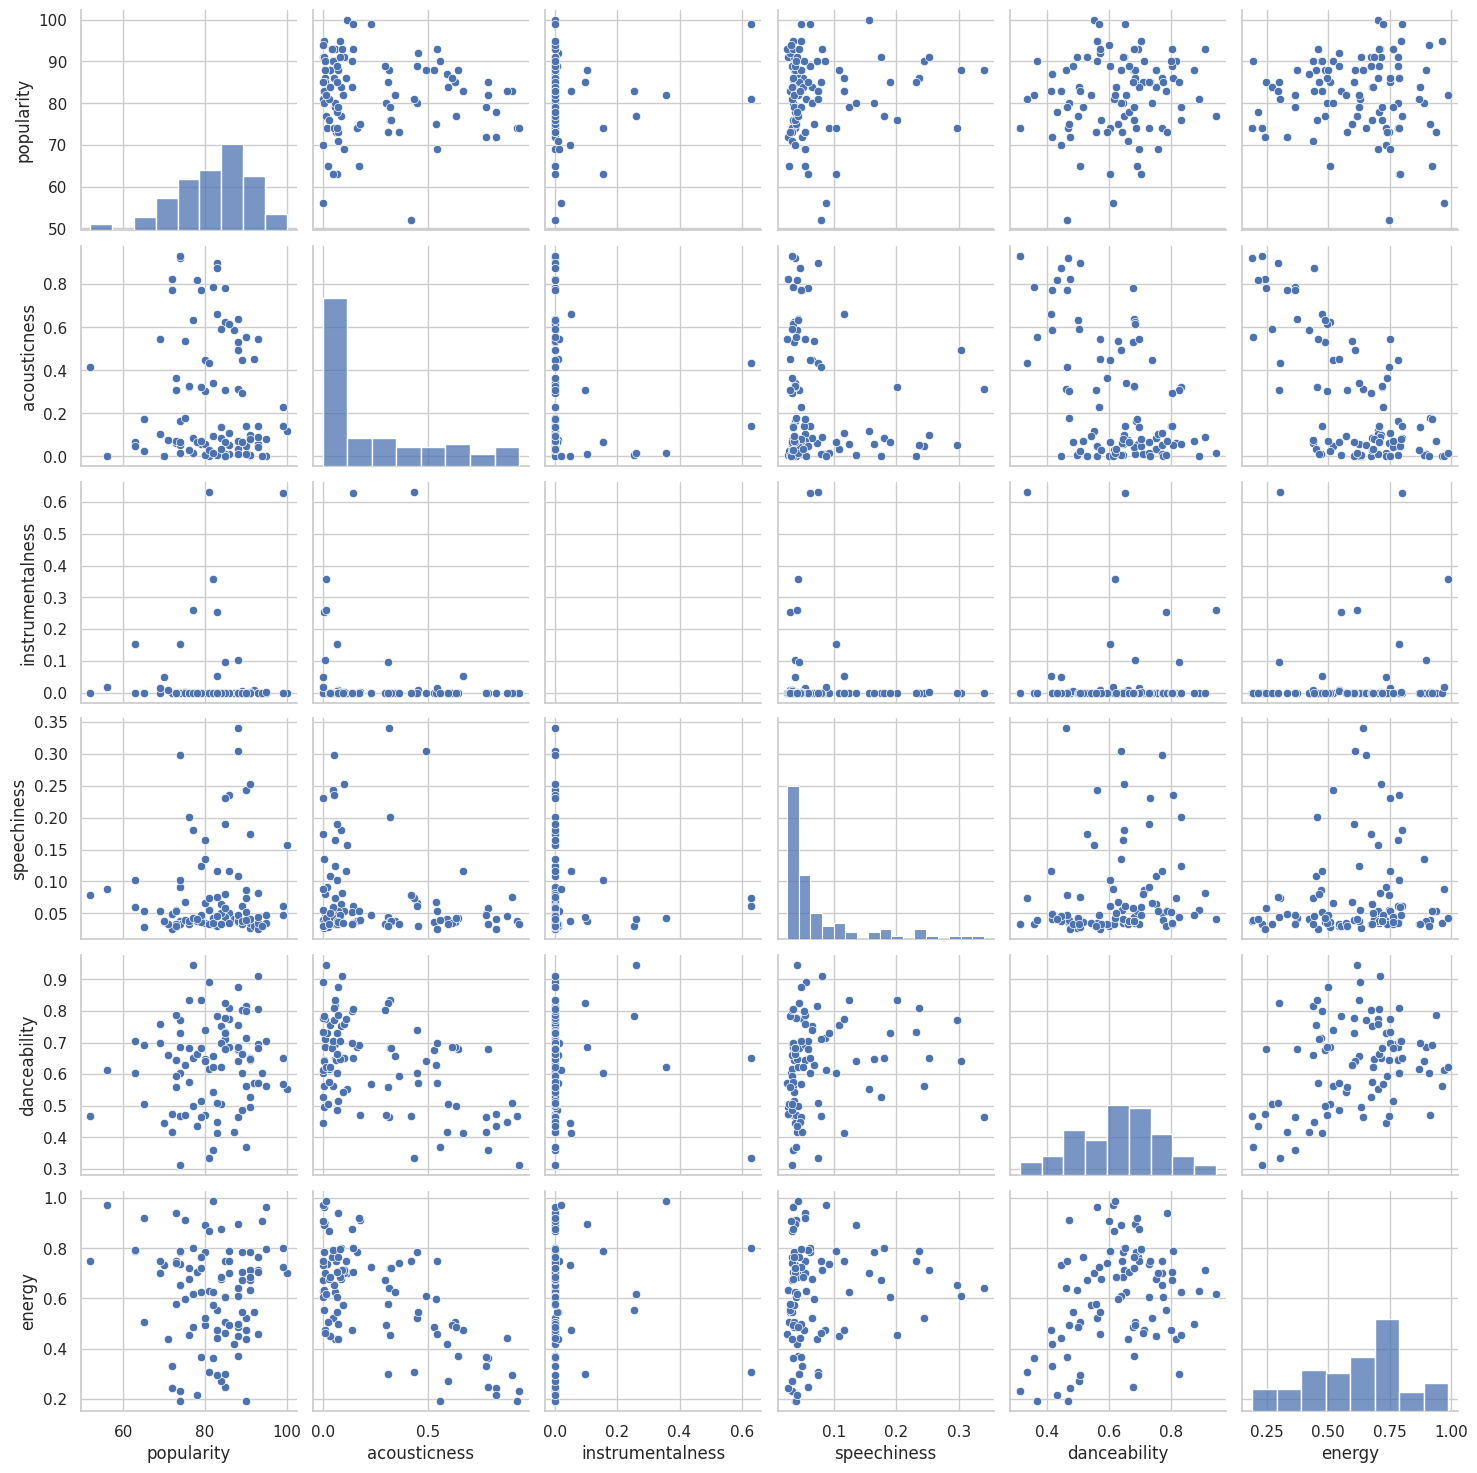

In [41]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["popularity", "acousticness", "instrumentalness", "speechiness", "danceability", "energy"]
sns.pairplot(df[cols], height=2.5)
plt.show()

<ipython-input-42-4cb30d0a44e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


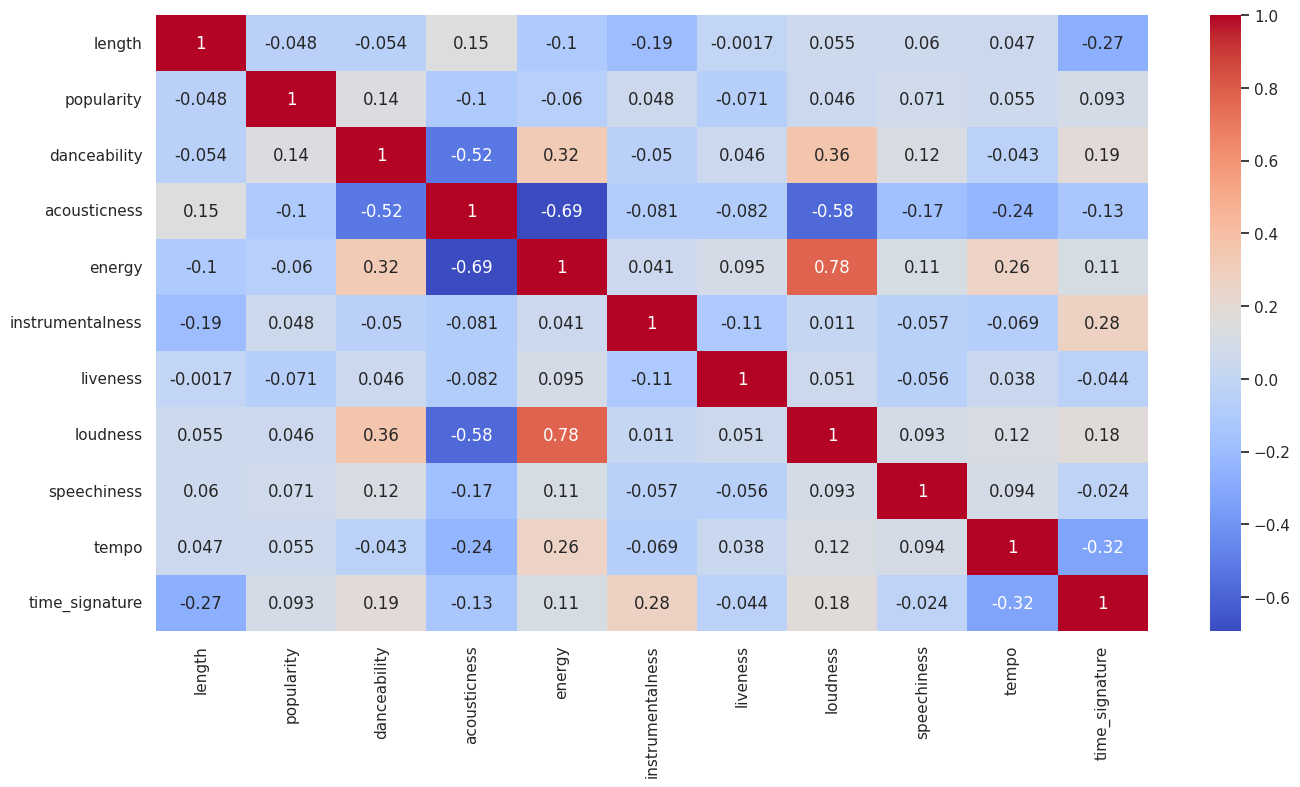

In [42]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

PREPROCESSING

In [43]:
df2 = df.drop(['release_date', 'name', 'album', 'artist', 'popularity'], axis=1)
df2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,272112,0.817,0.060300,0.440,0.000001,0.3300,-8.482,0.0734,142.024,4
1,198973,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4
2,218364,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4
3,217925,0.835,0.058900,0.626,0.000060,0.3960,-5.833,0.1250,91.030,4
4,239359,0.561,0.050300,0.520,0.000002,0.3550,-9.342,0.2440,153.150,3
...,...,...,...,...,...,...,...,...,...,...
95,268856,0.508,0.897000,0.296,0.000050,0.1100,-10.513,0.0755,82.532,4
96,221250,0.464,0.772000,0.366,0.000016,0.0949,-9.025,0.0470,78.846,4
97,188882,0.560,0.309000,0.576,0.000021,0.0988,-6.920,0.0300,133.491,4
98,290892,0.447,0.874000,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df2

,length,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,1.571456,1.361679,-0.693181,-0.928167,-0.272963,1.179454,-0.716413,-0.020662,0.707515,0.217072
1,-0.143530,0.893467,-0.791699,-0.881803,-0.272167,2.920334,-1.015158,0.511979,-1.813430,0.217072
2,0.311156,-0.778718,-0.911276,0.272160,-0.272953,-0.679053,0.828944,1.499461,1.636403,0.217072
3,0.300862,1.495454,-0.698271,0.030034,-0.272390,1.697013,0.369148,0.751369,-1.274646,0.217072
4,0.803453,-0.540896,-0.729534,-0.516038,-0.272959,1.375499,-1.068841,2.531829,1.139988,-3.400801
...,...,...,...,...,...,...,...,...,...,...
95,1.495108,-0.934789,2.348502,-1.670000,-0.272488,-0.545742,-1.548718,0.010758,-1.604968,0.217072
96,0.378828,-1.261794,1.894085,-1.309387,-0.272822,-0.664153,-0.938935,-0.415655,-1.748244,0.217072
97,-0.380147,-0.548328,0.210926,-0.227547,-0.272773,-0.633570,-0.076305,-0.670007,0.375833,0.217072
98,2.011815,-1.388136,2.264889,-0.923016,-0.272551,0.065918,-0.378738,-0.436602,-0.039303,0.217072


In [45]:
df2.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(scaled).xlsx', index=False)

KMEANS CLUSTERING MODEL

In [46]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=1000, random_state=42)
    model.fit(df2)
    wcss.append(model.inertia_)

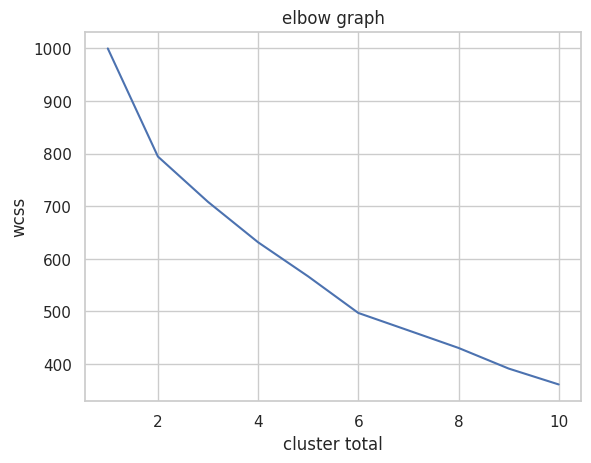

In [47]:
plt.plot(range(1,11),wcss)
plt.title('elbow graph')
plt.xlabel('cluster total')
plt.ylabel('wcss')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df2)

In [49]:
df['cluster'] = y_kmeans
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Search & Rescue,Search & Rescue,Drake,2023-04-07,272112,90,0.817,0.060300,0.440,0.000001,0.3300,-8.482,0.0734,142.024,4,2
1,God's Plan,Scorpion,Drake,2018-06-29,198973,88,0.754,0.033200,0.449,0.000083,0.5520,-9.211,0.1090,77.169,4,2
2,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,91,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4,3
3,In My Feelings,Scorpion,Drake,2018-06-29,217925,79,0.835,0.058900,0.626,0.000060,0.3960,-5.833,0.1250,91.030,4,2
4,Rich Flex,Her Loss,Drake,2022-11-04,239359,90,0.561,0.050300,0.520,0.000002,0.3550,-9.342,0.2440,153.150,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Burn, Burn, Burn","Burn, Burn, Burn",Zach Bryan,2022-09-08,268856,83,0.508,0.897000,0.296,0.000050,0.1100,-10.513,0.0755,82.532,4,0
96,Revival,Elisabeth,Zach Bryan,2020-05-08,221250,79,0.464,0.772000,0.366,0.000016,0.0949,-9.025,0.0470,78.846,4,0
97,Tishomingo,American Heartbreak,Zach Bryan,2022-05-20,188882,73,0.560,0.309000,0.576,0.000021,0.0988,-6.920,0.0300,133.491,4,3
98,Dawns (feat. Maggie Rogers),Dawns (feat. Maggie Rogers),Zach Bryan,2023-01-27,290892,83,0.447,0.874000,0.441,0.000044,0.1880,-7.658,0.0456,122.811,4,0


In [50]:
clus_0 = df[df["cluster"]==0]
clus_1 = df[df["cluster"]==1]
clus_2 = df[df["cluster"]==2]
clus_3 = df[df["cluster"]==3]

In [51]:
df.cluster.value_counts()

3    54
0    22
2    18
1     6
Name: cluster, dtype: int64

In [52]:
df_result = pd.DataFrame(clus_0.mean(), columns=['Alternative'])
df_result.insert(1, "Pop", clus_1.mean())
df_result.insert(2, "New Age", clus_2.mean())
df_result.insert(3, "Rap", clus_3.mean())

df_result

<ipython-input-52-06a2fd0c3d4e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_result = pd.DataFrame(clus_0.mean(), columns=['Alternative'])
<ipython-input-52-06a2fd0c3d4e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_result.insert(1, "Pop", clus_1.mean())
<ipython-input-52-06a2fd0c3d4e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the val

,Alternative,Pop,New Age,Rap
length,203132.727273,245576.166667,198327.777778,203650.685185
popularity,81.409091,78.333333,81.666667,82.851852
danceability,0.549864,0.467500,0.665889,0.675741
acousticness,0.599655,0.482050,0.135522,0.121737
energy,0.379455,0.426833,0.690056,0.716426
instrumentalness,0.036193,0.002301,0.003811,0.035458
liveness,0.146341,0.200233,0.400167,0.117324
loudness,-9.337318,-10.049667,-5.887333,-5.586833
speechiness,0.054668,0.072133,0.058244,0.088781
tempo,103.239045,150.628833,124.390556,129.039852


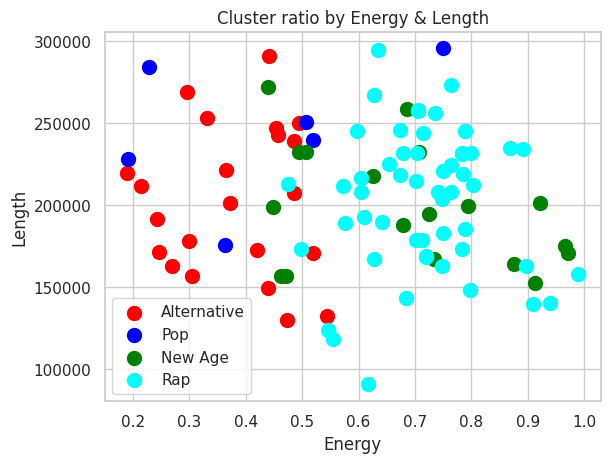

In [53]:
plt.scatter(clus_0['energy'], clus_0['length'], s=100, c='red', label='Alternative')
plt.scatter(clus_1['energy'], clus_1['length'], s=100, c='blue', label='Pop')
plt.scatter(clus_2['energy'], clus_2['length'], s=100, c='green', label='New Age')
plt.scatter(clus_3['energy'], clus_3['length'], s=100, c='cyan', label='Rap')

plt.title('Cluster ratio by Energy & Length')
plt.xlabel('Energy')
plt.ylabel('Length')
plt.legend()
plt.show()

In [54]:
clus_0

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
5,Toosie Slide,Toosie Slide,Drake,2020-04-03,247058,76,0.834,0.3210,0.454,0.000006,0.1140,-9.750,0.2010,81.618,4,0
15,This Love (Taylor’s Version),This Love (Taylor’s Version),Taylor Swift,2022-05-06,250100,80,0.470,0.3020,0.494,0.000000,0.0672,-8.672,0.0349,144.039,4,0
21,Stay With Me,In The Lonely Hour,Sam Smith,2014-05-26,172723,87,0.418,0.5880,0.420,0.000064,0.1100,-6.444,0.0414,84.094,4,0
22,I'm Not The Only One,In The Lonely Hour,Sam Smith,2014-05-26,239316,88,0.677,0.5290,0.485,0.000020,0.0766,-5.795,0.0361,82.001,4,0
23,Too Good At Goodbyes,The Thrill Of It All (Special Edition),Sam Smith,2017-11-03,201000,88,0.681,0.6400,0.372,0.000000,0.1690,-8.237,0.0432,91.873,4,0
26,Lay Me Down,In The Lonely Hour (Drowning Shadows Edition),Sam Smith,2015-11-06,219535,74,0.468,0.9190,0.190,0.000000,0.1070,-11.138,0.0373,125.319,4,0
27,Dancing With A Stranger (with Normani),Love Goes,Sam Smith,2020-10-30,171029,80,0.741,0.4470,0.520,0.000002,0.2220,-7.513,0.0656,102.998,4,0
29,Lay Me Down,In The Lonely Hour,Sam Smith,2014-05-26,253208,72,0.417,0.7730,0.332,0.000019,0.1090,-9.482,0.0494,119.156,4,0
30,Romantic Homicide,Romantic Homicide,d4vd,2022-07-20,132630,92,0.571,0.4530,0.544,0.008050,0.3220,-10.613,0.0299,132.052,4,0
31,Here With Me,Petals to Thorns,d4vd,2023-05-26,242484,93,0.571,0.5440,0.458,0.000093,0.1230,-9.283,0.0258,132.025,4,0


In [55]:
clus_1

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
4,Rich Flex,Her Loss,Drake,2022-11-04,239359,90,0.561,0.0503,0.520,0.000002,0.3550,-9.342,0.2440,153.150,3,1
32,Sleep Well,Petals to Thorns,d4vd,2023-05-26,175875,82,0.358,0.7860,0.363,0.000007,0.1420,-10.559,0.0340,151.150,3,1
33,This Is How It Feels (with Laufey),Petals to Thorns,d4vd,2023-05-26,284305,74,0.312,0.9310,0.229,0.000000,0.1650,-11.656,0.0327,132.493,3,1
37,Backstreet Girl,Petals to Thorns,d4vd,2023-05-26,250492,65,0.506,0.0270,0.507,0.000086,0.1110,-10.109,0.0279,140.733,3,1
58,Mercury,Gemini Rights,Steve Lacy,2022-07-15,295413,69,0.699,0.5430,0.750,0.013700,0.3330,-6.481,0.0542,151.035,3,1
90,Something in the Orange,Something in the Orange,Zach Bryan,2022-04-22,228013,90,0.369,0.5550,0.192,0.000008,0.0954,-12.151,0.0400,175.212,3,1


In [56]:
clus_2

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
0,Search & Rescue,Search & Rescue,Drake,2023-04-07,272112,90,0.817,0.060300,0.440,0.000001,0.330,-8.482,0.0734,142.024,4,2
1,God's Plan,Scorpion,Drake,2018-06-29,198973,88,0.754,0.033200,0.449,0.000083,0.552,-9.211,0.1090,77.169,4,2
3,In My Feelings,Scorpion,Drake,2018-06-29,217925,79,0.835,0.058900,0.626,0.000060,0.396,-5.833,0.1250,91.030,4,2
20,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),Sam Smith,2022-09-22,156943,90,0.714,0.013000,0.472,0.000005,0.266,-7.375,0.0864,131.121,4,2
24,Unholy (feat. Kim Petras),Gloria,Sam Smith,2023-01-27,156943,85,0.712,0.011000,0.463,0.000003,0.301,-7.399,0.0797,131.199,4,2
34,You and I,Petals to Thorns,d4vd,2023-05-26,152551,75,0.471,0.178000,0.913,0.000465,0.440,-6.727,0.0392,90.231,4,2
39,Take Me To The Sun,Take Me To The Sun,d4vd,2022-05-09,166996,70,0.446,0.000008,0.734,0.049200,0.564,-9.750,0.0374,178.182,4,2
51,Bad Habit,Bad Habit,Steve Lacy,2022-06-29,232114,85,0.686,0.626000,0.507,0.000075,0.383,-7.097,0.0357,168.955,4,2
55,Bad Habit,Gemini Rights,Steve Lacy,2022-07-15,232066,86,0.686,0.613000,0.494,0.000058,0.402,-7.093,0.0355,168.946,4,2
60,un x100to,un x100to,Grupo Frontera,2023-04-17,194563,99,0.569,0.228000,0.724,0.000000,0.270,-4.076,0.0474,83.118,4,2


In [57]:
clus_3

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,cluster
2,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",Drake,2022-06-17,218364,91,0.529,0.000307,0.673,0.000002,0.0930,-4.711,0.1750,165.921,4,3
6,WAIT FOR U (feat. Drake & Tems),I NEVER LIKED YOU,Future,2022-04-29,189893,88,0.463,0.314000,0.642,0.000000,0.0686,-4.474,0.3400,83.389,4,3
7,Spin Bout U,Her Loss,Drake,2022-11-04,214588,86,0.773,0.010000,0.701,0.000000,0.1630,-6.386,0.0512,129.963,4,3
8,Hotline Bling,Views,Drake,2016-05-06,267066,81,0.891,0.002580,0.628,0.000190,0.0504,-7.863,0.0551,134.966,4,3
9,Oh U Went (feat. Drake),BUSINESS IS BUSINESS,Young Thug,2023-06-23,185333,86,0.808,0.051700,0.789,0.000000,0.0819,-5.880,0.2360,136.010,4,3
10,Cruel Summer,Lover,Taylor Swift,2019-08-23,178426,100,0.552,0.117000,0.702,0.000021,0.1050,-5.707,0.1570,169.994,4,3
11,Bad Blood,1989,Taylor Swift,2014-10-27,211933,77,0.650,0.087100,0.802,0.000007,0.1480,-6.114,0.1810,170.146,4,3
12,Blank Space,1989,Taylor Swift,2014-10-27,231826,84,0.753,0.085000,0.678,0.000002,0.1300,-5.421,0.0644,96.006,4,3
13,I Can See You (Taylor’s Version) (From The Vault),Speak Now (Taylor's Version),Taylor Swift,2023-07-07,273186,93,0.694,0.058600,0.764,0.000000,0.0608,-4.893,0.0337,123.044,4,3
14,You Belong With Me,Fearless,Taylor Swift,2008-11-11,231133,74,0.687,0.162000,0.783,0.000013,0.1140,-4.440,0.0386,129.964,4,3


In [59]:
df.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(clustered).xlsx', index=False)
df_result.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(df_result).xlsx', index=False)
clus_0.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(cluster_0).xlsx', index=False)
clus_1.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(cluster_1).xlsx', index=False)
clus_2.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(cluster_2).xlsx', index=False)
clus_3.to_excel(f'/content/drive/My Drive/datasets/Spotify Datasets/top_artist_music_2023(cluster_3).xlsx', index=False)